## Importando as bibliotecas

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')


## Importando o dataset

In [39]:
data = pd.read_csv('ds_salaries.csv')

In [40]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [41]:
data.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [42]:
data = data.drop(columns="Unnamed: 0")

In [43]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [44]:
data.shape

(607, 11)

#### Verificando se há dados nulos

In [45]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

#### Transformando Siglas de experiência em títulos

In [46]:
XP = {'EN': 'Intern', 'MI': 'Junior', 'SE': 'Sênior', 'EX': 'Expert'}


In [47]:
data['experience_level'].replace(XP, inplace = True)

In [48]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Junior,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Sênior,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Sênior,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Junior,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Sênior,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<AxesSubplot:>

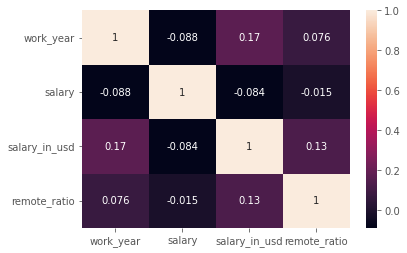

In [49]:
correlacao = data.corr()
sns.heatmap(data.corr(), xticklabels=correlacao.columns, yticklabels=correlacao.columns, annot=True)

#### A correlação mais encontrada é entre o tempo de experiência e o salário em USD, o que se explica que quanto mais experiente o funcionário maior será seu salário de acordo com a correlação estabelecida pela base de dados.

<AxesSubplot:xlabel='job_title'>

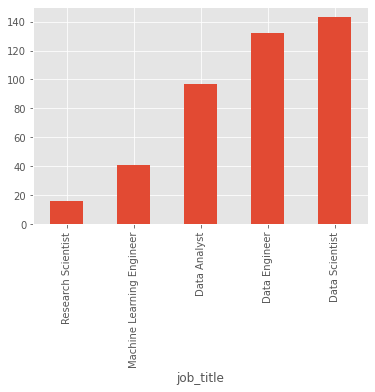

In [50]:
data.groupby(['job_title']).job_title.count().sort_values()[-5:].plot(kind='bar')


#### Para termos uma amostra melhor da base, agrupei os títulos de cargos e os contei, podemos ver então os cinco que mais aparecem, com destaque para Cientista de Dados e Engenheiro de Dados

<AxesSubplot:ylabel='job_title'>

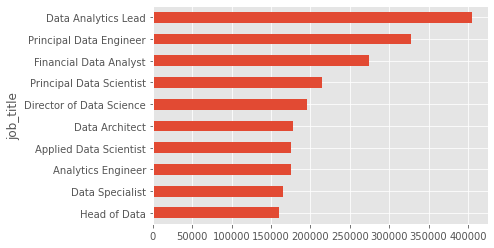

In [51]:
data.groupby(['job_title']).salary_in_usd.mean().sort_values()[-10:].plot(kind='barh')

#### Uma informação interessante neste gráfico acima é que a média salarial do analista financeiro é maior que a de um diretor de Data Science por exemplo.

<AxesSubplot:ylabel='experience_level'>

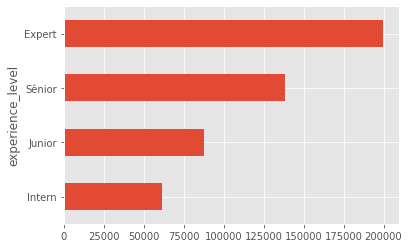

In [52]:
data.groupby(['experience_level']).salary_in_usd.mean().sort_values()[-10:].plot(kind='barh')

#### Média de salários pelo nível de experiência.

<AxesSubplot:ylabel='employee_residence'>

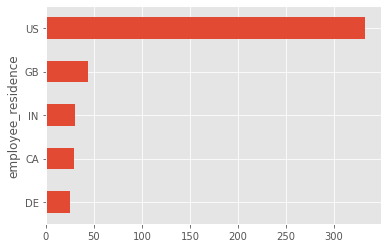

In [53]:
data.groupby(['employee_residence']).job_title.count().sort_values()[-5:].plot(kind='barh')

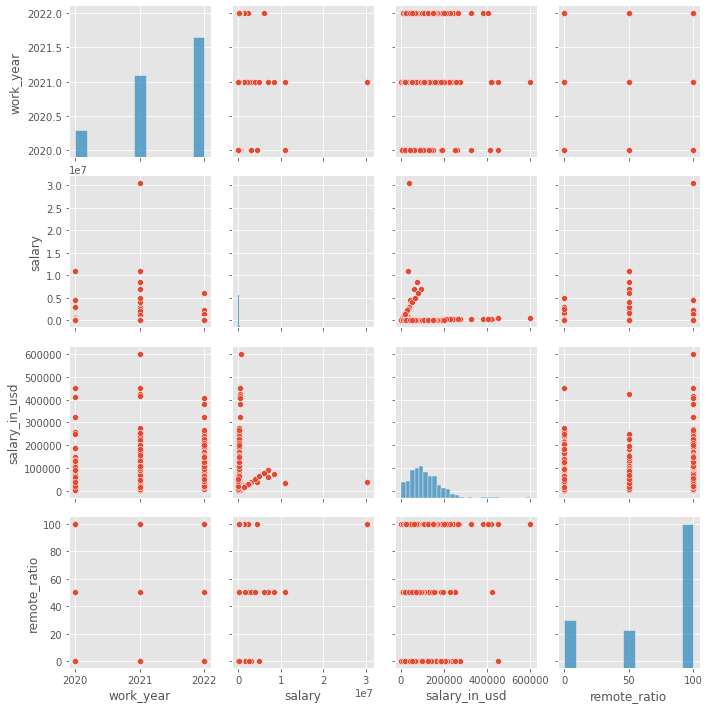

In [54]:
sns.pairplot(data)

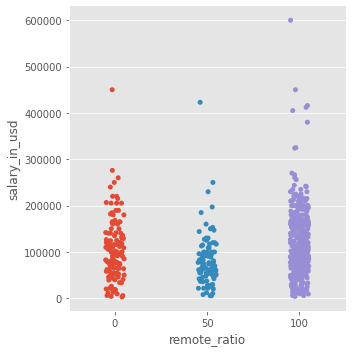

In [55]:
sns.catplot(x='remote_ratio', y = 'salary_in_usd', data = data)

#### Exemplificando uma das análises feitas no grupo acima, neste gráfico podemos ver que a maioria das pessoas que trabalham com dados, o fazem 100% remoto e que o maior salário está neste eixo também.

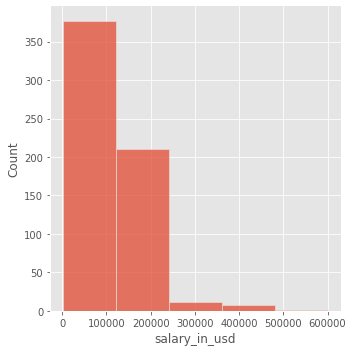

In [56]:
sns.displot(data['salary_in_usd'], bins=5)

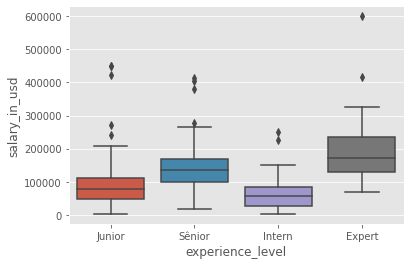

In [57]:
ax = sns.boxplot(x="experience_level", y="salary_in_usd",data=data)

#### Nesta análise podemos ver que temos um acúmulo de funcionários ganhando entre 20k e 30 k no nível de Expert, nos demais níveis de experiência temos salários abaixo de 20k em USD por mês em sua maioria.